In [19]:
#This code snippet demonstrates how a DecisionTreeRegression classifer compares to linear regression for predicting mpg where the purple line is linear regression and the red line is a tree classifier

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from sklearn import preprocessing
import sys
from pandas.api.types import is_numeric_dtype

     MPG          Make             Model  Displacement  Horse Power  \
0   18.8  Aston Martin              DB11           5.2          600   
2   22.7  Aston Martin           DB11 V8           4.0          503   
4   17.7  Aston Martin               DBS           5.2          715   
6   22.5  Aston Martin        Vantage V8           4.0          503   
14  28.6           BMW  230i Convertible           2.0          248   

    Cylinders  Number_Of_Gears  Weight  Test Procedure Cd  
0        12.0                8    4500                 21  
2         8.0                8    4500                 21  
4        12.0                8    4500                 21  
6         8.0                8    4000                 21  
14        4.0                8    4000                 21  


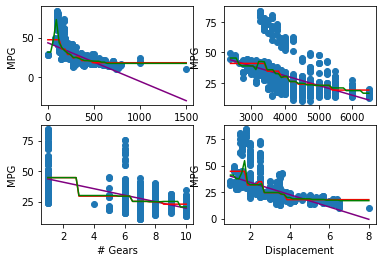

In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/cars_mpg_tree_classifiers.csv",usecols=["MPG","Make","Model","Displacement","Horse Power","Cylinders","Number_Of_Gears","Weight","Test Procedure Cd"])
df=df[df["Test Procedure Cd"]==21]
print(df.head(5))

dt=DecisionTreeRegressor(max_depth=4,
	min_samples_leaf=0.1,  #each leaf must contain 10% of the training data
	random_state=3)

reg=LinearRegression()
SEED=1

gbt=GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

#######Horse Power
X_horsePower=np.array(df["Horse Power"]).reshape(-1,1)
y_mpg=np.array(df["MPG"])

reg.fit(X_horsePower,y_mpg)
prediction_space=np.linspace(min(X_horsePower),max(X_horsePower)).reshape(-1,1)
fig, ax= plt.subplots(2,2)
ax[0,0].scatter(df["Horse Power"],y_mpg)
ax[0,0].set_xlabel('Horse Power')
ax[0,0].set_ylabel('MPG')

X_train, X_test,y_train,y_test=train_test_split(X_horsePower,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
gbt.fit(X_train,y_train) 

#######Weight
#y_prediction=regression.predict(X_test)
ax[0,0].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[0,0].plot(prediction_space, dt.predict(prediction_space), c="Red")
ax[0,0].plot(prediction_space, gbt.predict(prediction_space), c="Green")

X_weight=np.array(df["Weight"]).reshape(-1,1)
prediction_space=np.linspace(min(X_weight),max(X_weight)).reshape(-1,1)
X_train, X_test,y_train,y_test=train_test_split(X_weight,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
gbt.fit(X_train,y_train) 
ax[0,1].scatter(pd.Series(df["Weight"]),y_mpg)
ax[0,1].set_xlabel('Weight')
ax[0,1].set_ylabel('MPG')
ax[0,1].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[0,1].plot(prediction_space, dt.predict(prediction_space), c="Red")
ax[0,1].plot(prediction_space, gbt.predict(prediction_space), c="Green")

#######Number of Gears
X_gears=np.array(df["Number_Of_Gears"]).reshape(-1,1)
prediction_space=np.linspace(min(X_gears),max(X_gears)).reshape(-1,1)
X_train, X_test,y_train,y_test=train_test_split(X_gears,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
gbt.fit(X_train,y_train) 

ax[1,0].scatter(pd.Series(df["Number_Of_Gears"]),y_mpg)
ax[1,0].set_xlabel('# Gears')
ax[1,0].set_ylabel('MPG')
ax[1,0].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[1,0].plot(prediction_space, dt.predict(prediction_space), c="Red")
ax[1,0].plot(prediction_space, gbt.predict(prediction_space), c="Green")

X_displacement=np.array(df["Displacement"]).reshape(-1,1)
prediction_space=np.linspace(min(X_gears),max(X_displacement)).reshape(-1,1)
X_train, X_test,y_train,y_test=train_test_split(X_displacement,y_mpg,test_size=0.2,random_state=42)
regression.fit(X_train,y_train)
dt.fit(X_train, y_train)
gbt.fit(X_train,y_train) 
#######Displacement
ax[1,1].scatter(pd.Series(df["Displacement"]),y_mpg)
ax[1,1].set_xlabel('Displacement')
ax[1,1].set_ylabel('MPG')
ax[1,1].plot(prediction_space, regression.predict(prediction_space), c="Purple")
ax[1,1].plot(prediction_space, dt.predict(prediction_space), c="Red")
ax[1,1].plot(prediction_space, gbt.predict(prediction_space), c="Green")

plt.show()






    Horse Power  Weight   MPG
0           600    4500  18.8
2           503    4500  22.7
4           715    4500  17.7
6           503    4000  22.5
14          248    4000  28.6
[[ 600. 4500.]
 [ 503. 4500.]
 [ 715. 4500.]
 ...
 [ 250. 4500.]
 [ 316. 5000.]
 [ 316. 5000.]]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


<Figure size 432x288 with 0 Axes>

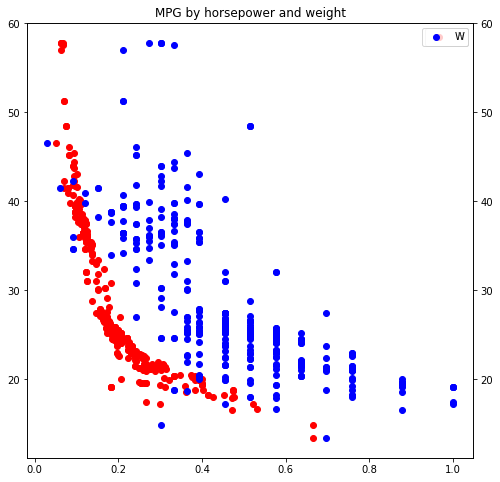

In [10]:



#X_df=df[["Horse Power","Weight","Number_Of_Gears","Displacement","MPG"]]
#X_df=df[["Weight","Displacement","MPG"]]
X_df=df[["Horse Power","Weight","MPG"]]
print(X_df.head(5))

dataset=np.nan_to_num(X_df.values)
X=dataset[:,0:-1]
y=dataset[:,-1]

print(X)
#print(y)
#sys.exit()


min_max_scaler= preprocessing.MinMaxScaler()
X_scale= min_max_scaler.fit_transform(X)
   
X_train, X_test, y_train, y_test= train_test_split(X_scale,y,test_size=0.3)

early_stopping_monitor=EarlyStopping(patience=3)

n_cols=X.shape[1]
model=Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, activation='relu'))
#model.add(Dense(100, activation='tanh', input_shape=(1,)))
#model.add(Dense(100, activation='tanh'))

model.add(Dense(1))

#myOptimizer=SGD(0.1)
#model.compile(optimizer=myOptimizer, loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer=myOptimizer,  metrics=['accuracy'])
model.fit(X_train, y_train,callbacks=[early_stopping_monitor], verbose=0, nb_epoch=200)
#model.fit(X, y,callbacks=[early_stopping_monitor],  nb_epoch=20)

predictionResults=model.predict(X_test)

#index=0
#for item in predictionResults:
#    print (str(item)+":"+str(y_test[index]) 
           #+ 'hp:' + str(X_test[index,0]) 
           #+ 'wgt:'+ str(X_test[index,1]) 
#          + 'gears:' + str(X_test[index,2]) 
#           + 'displacement:'+ str(X_test[index,3])
#          )
#    index+=1
plt.clf()
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X_test[:,0],predictionResults[:,0],color='red',label="Horse Power")
twin_ax=ax.twinx()
twin_ax.scatter(X_test[:,1],predictionResults[:,0],color='blue', label="Weight")

#plt.scatter(X_test[:,0],predictionResults[:,0],color='red',label="Displacement")

#plt.scatter(X_test[:,0],predictionResults[:,0],color='red',label="Weight")
#plt.scatter(X_test[:,1],predictionResults[:,0],color='blue', label="Displacement")

#plt.scatter(X_test[:,0],predictionResults[:,0],color='red',label="Horse Power")
#plt.scatter(X_test[:,1],predictionResults[:,0],color='blue', label="Weight")
#plt.scatter(X_test[:,2],predictionResults[:,0],color='green', label="Gears")
#plt.scatter(X_test[:,3],predictionResults[:,0],color='purple', label="Displacement")
ax.legend("Horse Power")
twin_ax.legend("Weight")
#plt.plot(x,y)
plt.title('MPG by horsepower and weight')
plt.show()

In [11]:
print("Weight tons min {} max {}".format(df['Weight'].min()/2000,df['Weight'].max()/2000))
print("Horse power min {} max {}".format(df['Horse Power'].min(),df['Horse Power'].max()))

Weight tons min 1.1875 max 3.25
Horse power min 1 max 1500


[[1.200e+01 5.200e+00 4.500e+03]
 [8.000e+00 4.000e+00 4.500e+03]
 [1.200e+01 5.200e+00 4.500e+03]
 ...
 [4.000e+00 1.969e+00 4.500e+03]
 [4.000e+00 1.969e+00 5.000e+03]
 [4.000e+00 1.969e+00 5.000e+03]]


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


<Figure size 432x288 with 0 Axes>

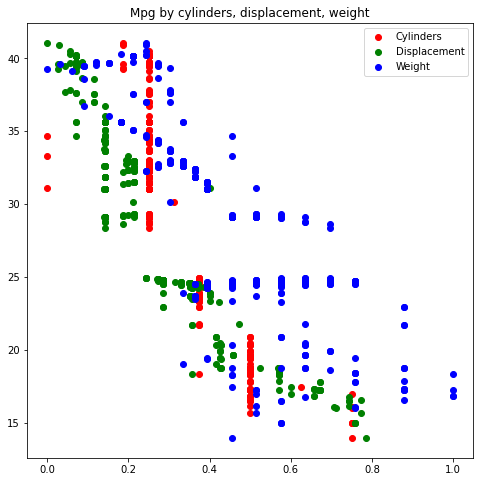

In [12]:
X_df=df[["Cylinders","Displacement","Weight","MPG"]]
#print(X_df.head(5))

dataset=np.nan_to_num(X_df.values)
X=dataset[:,0:-1]
y=dataset[:,-1]

print(X)
#print(y)
#sys.exit()


min_max_scaler= preprocessing.MinMaxScaler()
X_scale= min_max_scaler.fit_transform(X)
   
X_train, X_test, y_train, y_test= train_test_split(X_scale,y,test_size=0.3)

early_stopping_monitor=EarlyStopping(patience=3)

n_cols=X.shape[1]
model=Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, activation='relu'))
#model.add(Dense(100, activation='tanh', input_shape=(1,)))
#model.add(Dense(100, activation='tanh'))

model.add(Dense(1))

#myOptimizer=SGD(0.1)
#model.compile(optimizer=myOptimizer, loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
#model.compile(optimizer=myOptimizer,  metrics=['accuracy'])
model.fit(X_train, y_train,callbacks=[early_stopping_monitor], verbose=0, nb_epoch=200)
#model.fit(X, y,callbacks=[early_stopping_monitor],  nb_epoch=20)

predictionResults=model.predict(X_test)

#index=0
#for item in predictionResults:
#    print (str(item)+":"+str(y_test[index]) 
           #+ 'hp:' + str(X_test[index,0]) 
           #+ 'wgt:'+ str(X_test[index,1]) 
#          + 'gears:' + str(X_test[index,2]) 
#           + 'displacement:'+ str(X_test[index,3])
#          )
#    index+=1
plt.clf()
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X_test[:,0],predictionResults[:,0],color='red',label="Cylinders")

ax.scatter(X_test[:,1],predictionResults[:,0],color='green',label="Displacement")
ax.scatter(X_test[:,2],predictionResults[:,0],color='blue', label="Weight")

plt.legend(['Cylinders','Displacement','Weight'])
plt.title("Mpg by cylinders, displacement, weight")
#plt.plot(x,y)
plt.show()



In [13]:
print("Cylinders min {} max {}".format(df['Cylinders'].min(),df['Cylinders'].max()))
print("Weight tons min {} max {}".format(df['Weight'].min()/2000,df['Weight'].max()/2000))
print("Displacement min {} max {}".format(df['Displacement'].min(),df['Displacement'].max()))

print("The higher the displace the less fuel efficient and the more power")
print("In general the more cylinder the less fuel efficient and the more power")

Cylinders min 3.0 max 16.0
Weight tons min 1.1875 max 3.25
Displacement min 1.0 max 7.992999999999999
The higher the displace the less fuel efficient and the more power
In general the more cylinder the less fuel efficient and the more power


In [23]:
print(df.columns)


Index(['MPG', 'Make', 'Model', 'Displacement', 'Horse Power', 'Cylinders',
       'Number_Of_Gears', 'Weight', 'Test Procedure Cd'],
      dtype='object')
0       Aston Martin
2       Aston Martin
4       Aston Martin
6       Aston Martin
14               BMW
            ...     
4258      VOLKSWAGEN
4260      VOLKSWAGEN
4284           Volvo
4297           Volvo
4298           Volvo
Name: Make, Length: 1215, dtype: object


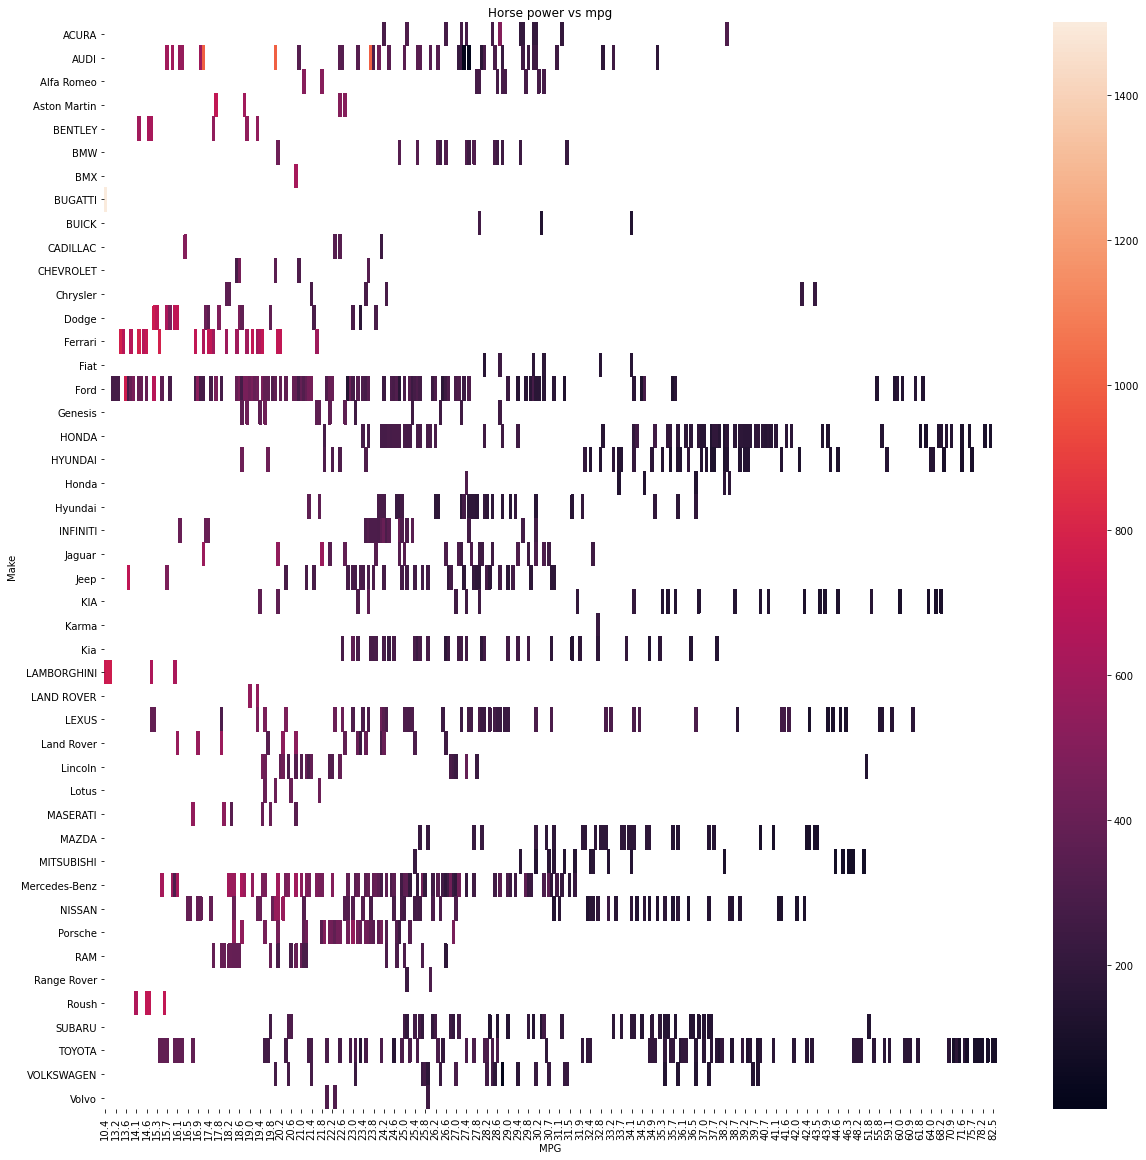

In [41]:
df['Horse Power']=df['Horse Power'].astype('float64')
result=df.pivot_table(index='Make',columns='MPG',values='Horse Power',aggfunc=np.mean)
result=result.sort_values(by='Make',ascending=True)
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(data=result,ax=ax)
plt.title('Horse power vs mpg')
plt.show()